#Tarea 2

**Universidad Autónoma de Nuevo León** \\
Facultad de Ciencias Físico Matématicas

\\

**Introducción al Aprendizaje Automático** \\
MCE. Ángel Adrian Domínguez Lozano

\\
**Equipo 1**

*   Humberto Gerardo Peña Páez    1862464
*   Alberto Natanael Sanchez Robles 1861608




##Entregable 2: Uso de Logistic Regression, KNN y DT

\\

###Objetivo:
Que el alumno tenga un punto de partida pra consultar temas relacionados al aprendizaje automático.

\\

###Instrucciones: 
Considera los conjuntos de datos titanic_train y titanic_val.

Usa los modelos de regresión logística, KNN y DT para predecir la supervivencia de los pasajeros del titanic. Valida el rendimiento de tu modelo con los datos de titanic_val.

Debes probar distintos hiperparámetros en cada uno de los modelos.

##Data Reading

In [ ]:
#Importar librerías necesarias.
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
label = LabelEncoder()

In [ ]:
#Importar Datos
data_train = pd.read_excel("/content/titanic_train.xlsx")
data_test = pd.read_excel("/content/titanic_val.xlsx")

####For data_train

In [ ]:
data_train.dtypes
data_train = shuffle(data_train)
x_train = data_train
y_train = data_train['Survived']

In [ ]:
#Desechamos las columnas que no necesitemos
x_train = x_train.drop(labels= ['Name', 'Ticket', 'Fare', 'Cabin', 'Survived', 'PassengerId'], axis = 1)
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
#Añadiremos la columna de Family, contando SibSp(Pareja), Parch(Hijos) + 1(Él mismo)
x_train['Family'] = x_train['SibSp'] + x_train['Parch'] + 1

In [ ]:
x_train = x_train.drop(labels=['SibSp', 'Parch'], axis=1)
x_train.head()

,Pclass,Sex,Age,Embarked,Family
632,3,male,19.0,S,1
340,2,male,31.0,C,3
14,3,male,39.0,S,1
246,1,female,38.0,NaN,1
45,1,male,NaN,S,1


In [ ]:
#Verificar los datos en nulo
x_train.isnull().sum()

Pclass        0
Sex           0
Age         141
Embarked      2
Family        0
dtype: int64

In [ ]:
#Para rellenar los datos nulos:
#   En Age asignaremos la media de la edad.
#   En Embarked asignaremos el embarcadero más común.
x_train['Embarked'].mode()

0    S
dtype: object

In [ ]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
x_train['Embarked'] = x_train['Embarked'].fillna('S')

In [ ]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Family      0
dtype: int64

In [ ]:
#Se enumeraran los datos tipo Object para trabajar mejor con int
#   0 - Female | 1 - Male
x_train['Sex'] =  label.fit_transform(x_train['Sex'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}

In [ ]:
x_train.head()

,Pclass,Sex,Age,Embarked,Family
632,3,1,19.0,S,1
340,2,1,31.0,C,3
14,3,1,39.0,S,1
246,1,0,38.0,S,1
45,1,1,28.0,S,1


In [ ]:
#Agregamos variables dummies
x_train = pd.get_dummies(x_train, drop_first=True, columns=['Embarked'])

In [ ]:
columns = x_train.columns
columns

Index(['Pclass', 'Sex', 'Age', 'Family', 'Embarked_Q', 'Embarked_S'], dtype='object')

####For data_test

In [ ]:
data_test.dtypes
data_test = shuffle(data_test)
x_test = data_test
y_test = data_test['Survived']

In [ ]:
x_test = x_test.drop(labels= ['Name', 'Ticket', 'Fare', 'Cabin', 'Survived', 'PassengerId'], axis = 1)
x_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
x_test['Family'] = x_test['SibSp'] + x_test['Parch'] + 1
x_test = x_test.drop(labels=['SibSp', 'Parch'], axis=1)
x_test.head()

,Pclass,Sex,Age,Embarked,Family
73,3,male,20.0,C,1
119,3,female,NaN,Q,2
12,2,male,21.0,S,1
88,3,female,NaN,S,2
17,3,male,26.0,S,4


In [ ]:
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())
x_test['Embarked'] = x_test['Embarked'].fillna('S')

In [ ]:
x_test['Sex'] =  label.fit_transform(x_test['Sex'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}

In [ ]:
x_test = pd.get_dummies(x_test, drop_first=True, columns=['Embarked'])

In [ ]:
x_test.head()

,Pclass,Sex,Age,Family,Embarked_Q,Embarked_S
73,3,1,20.0,1,0,0
119,3,0,29.0,2,1,0
12,2,1,21.0,1,0,1
88,3,0,29.0,2,0,1
17,3,1,26.0,4,0,1


####Muestreo Final

In [ ]:
x_test


,Pclass,Sex,Age,Family,Embarked_Q,Embarked_S
73,3,1,20.0,1,0,0
119,3,0,29.0,2,1,0
12,2,1,21.0,1,0,1
88,3,0,29.0,2,0,1
17,3,1,26.0,4,0,1
...,...,...,...,...,...,...
156,2,1,16.0,1,0,1
23,3,1,29.0,1,0,1
46,1,0,63.0,2,0,1
112,2,1,54.0,1,0,1


In [ ]:
x_train

,Pclass,Sex,Age,Family,Embarked_Q,Embarked_S
632,3,1,19.0,1,0,1
340,2,1,31.0,3,0,0
14,3,1,39.0,1,0,1
246,1,0,38.0,1,0,1
45,1,1,28.0,1,0,1
...,...,...,...,...,...,...
546,3,1,21.0,1,0,1
32,2,1,29.0,2,0,1
554,2,1,62.0,1,0,1
105,3,0,45.0,6,0,1


In [ ]:
y_test

73     0
119    1
12     0
88     1
17     0
      ..
156    0
23     0
46     1
112    0
92     0
Name: Survived, Length: 178, dtype: int64

In [ ]:
y_train

632    0
340    0
14     0
246    1
45     1
      ..
546    0
32     0
554    1
105    0
683    1
Name: Survived, Length: 713, dtype: int64

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#Media y Varianza Conjunto Train
x_train.mean(axis=0).round(2),x_train.var(axis=0)

(array([-0., -0.,  0.,  0.,  0., -0.]), array([1., 1., 1., 1., 1., 1.]))

In [ ]:
#Media y Varianza Conjunto Test
x_test.mean(axis=0).round(2),x_test.var(axis=0)

(array([ 0.,  0., -0.,  0.,  0.,  0.]), array([1., 1., 1., 1., 1., 1.]))

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_raw = model_logistic.predict_proba(x_test)
y_pred_raw

array([[0.81983559, 0.18016441],
       [0.3208717 , 0.6791283 ],
       [0.67922066, 0.32077934],
       [0.47298945, 0.52701055],
       [0.94665547, 0.05334453],
       [0.90612952, 0.09387048],
       [0.18261271, 0.81738729],
       [0.90933246, 0.09066754],
       [0.29176543, 0.70823457],
       [0.92473397, 0.07526603],
       [0.91243667, 0.08756333],
       [0.17913382, 0.82086618],
       [0.86962919, 0.13037081],
       [0.83557219, 0.16442781],
       [0.20241256, 0.79758744],
       [0.06952578, 0.93047422],
       [0.27071864, 0.72928136],
       [0.3208717 , 0.6791283 ],
       [0.55219748, 0.44780252],
       [0.05029709, 0.94970291],
       [0.21938133, 0.78061867],
       [0.85262225, 0.14737775],
       [0.86816334, 0.13183666],
       [0.17357893, 0.82642107],
       [0.94709401, 0.05290599],
       [0.86816334, 0.13183666],
       [0.10452532, 0.89547468],
       [0.89699493, 0.10300507],
       [0.36290259, 0.63709741],
       [0.67621147, 0.32378853],
       [0.

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})

df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
131,0.131,0.634831,0.887324,0.525000,0.659686
128,0.128,0.617978,0.887324,0.512195,0.649485
129,0.129,0.617978,0.887324,0.512195,0.649485
130,0.130,0.617978,0.887324,0.512195,0.649485
121,0.121,0.601124,0.887324,0.500000,0.639594
122,0.122,0.601124,0.887324,0.500000,0.639594
123,0.123,0.601124,0.887324,0.500000,0.639594
124,0.124,0.601124,0.887324,0.500000,0.639594
125,0.125,0.601124,0.887324,0.500000,0.639594
126,0.126,0.601124,0.887324,0.500000,0.639594


In [ ]:
cut = 0.131
y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[50 57]
 [ 8 63]]
Accuracy:  0.6348314606741573
Precision:  0.525
Recall:  0.8873239436619719
F1:  0.6596858638743456


In [ ]:
px.scatter(df_metrics,x='Precision',y='Recall',hover_data=['Cut'])

##KNN 


In [ ]:
#Se importa el modelo desde sklearn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_raw = model_knn.predict_proba(x_test)
y_pred_raw

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8,

In [ ]:
#Predicción final con el método entrenado
final_pred = model_knn.predict(x_test)
final_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
400,0.400,0.775281,0.760563,0.701299,0.72973
274,0.274,0.775281,0.760563,0.701299,0.72973
272,0.272,0.775281,0.760563,0.701299,0.72973
271,0.271,0.775281,0.760563,0.701299,0.72973
270,0.270,0.775281,0.760563,0.701299,0.72973
269,0.269,0.775281,0.760563,0.701299,0.72973
268,0.268,0.775281,0.760563,0.701299,0.72973
267,0.267,0.775281,0.760563,0.701299,0.72973
266,0.266,0.775281,0.760563,0.701299,0.72973
265,0.265,0.775281,0.760563,0.701299,0.72973


In [ ]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
201,0.201,0.775281,0.760563,0.701299,0.72973
202,0.202,0.775281,0.760563,0.701299,0.72973
203,0.203,0.775281,0.760563,0.701299,0.72973
204,0.204,0.775281,0.760563,0.701299,0.72973
205,0.205,0.775281,0.760563,0.701299,0.72973
206,0.206,0.775281,0.760563,0.701299,0.72973
207,0.207,0.775281,0.760563,0.701299,0.72973
208,0.208,0.775281,0.760563,0.701299,0.72973
209,0.209,0.775281,0.760563,0.701299,0.72973
210,0.210,0.775281,0.760563,0.701299,0.72973


In [ ]:
cut = 0.201
y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[84 23]
 [17 54]]
Accuracy:  0.7752808988764045
Precision:  0.7012987012987013
Recall:  0.7605633802816901
F1:  0.7297297297297298


##DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model_dt = DecisionTreeClassifier(max_depth= 3)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

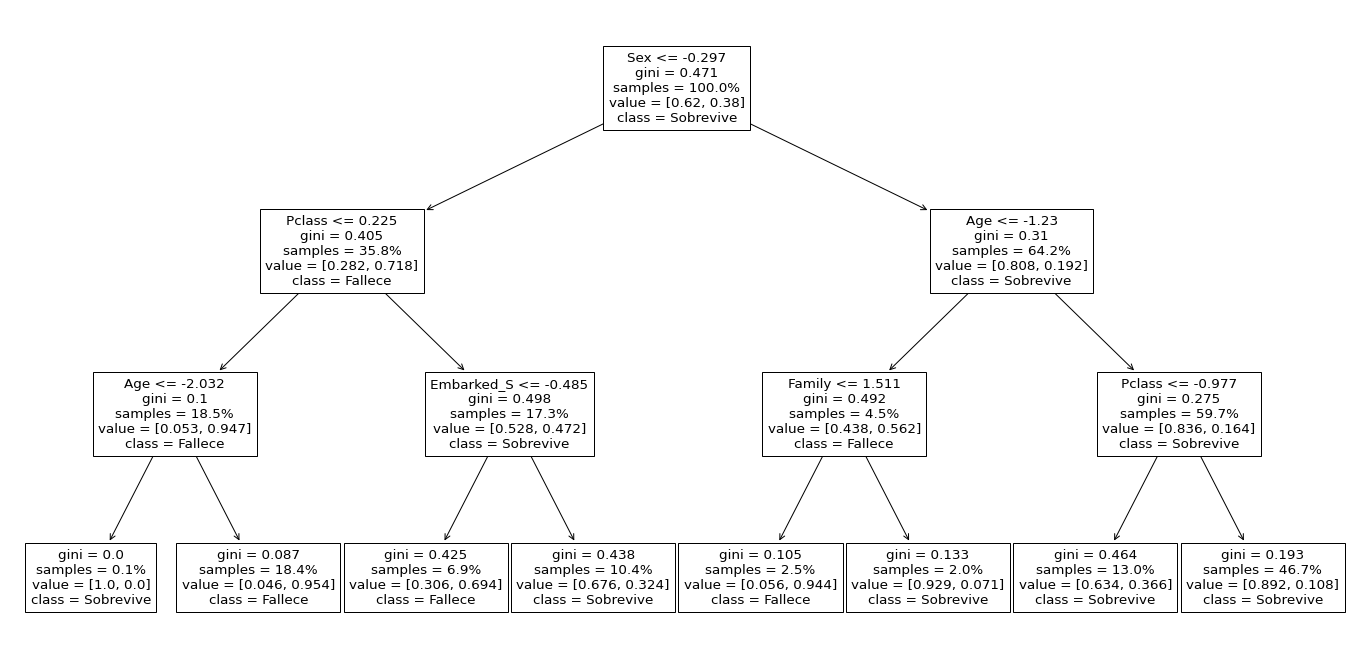

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(model_dt,max_depth=3,feature_names=columns,class_names =['Sobrevive', 'Fallece'],filled=False,
          impurity = True,proportion = True)
plt.show()

In [ ]:
y_pred_raw = model_dt.predict_proba(x_test)
y_pred_raw

array([[0.89189189, 0.10810811],
       [0.30612245, 0.69387755],
       [0.89189189, 0.10810811],
       [0.67567568, 0.32432432],
       [0.89189189, 0.10810811],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.89189189, 0.10810811],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.89189189, 0.10810811],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.04580153, 0.95419847],
       [0.30612245, 0.69387755],
       [0.30612245, 0.69387755],
       [0.67567568, 0.32432432],
       [0.04580153, 0.95419847],
       [0.04580153, 0.95419847],
       [0.05555556, 0.94444444],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.92857143, 0.07142857],
       [0.89189189, 0.10810811],
       [0.04580153, 0.95419847],
       [0.89189189, 0.10810811],
       [0.6344086 , 0.3655914 ],
       [0.6344086 , 0.3655914 ],
       [0.

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
227,0.227,0.780899,0.830986,0.686047,0.751592
204,0.204,0.780899,0.830986,0.686047,0.751592
222,0.222,0.780899,0.830986,0.686047,0.751592
221,0.221,0.780899,0.830986,0.686047,0.751592
220,0.220,0.780899,0.830986,0.686047,0.751592
219,0.219,0.780899,0.830986,0.686047,0.751592
218,0.218,0.780899,0.830986,0.686047,0.751592
217,0.217,0.780899,0.830986,0.686047,0.751592
216,0.216,0.780899,0.830986,0.686047,0.751592
215,0.215,0.780899,0.830986,0.686047,0.751592


In [ ]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
109,0.109,0.780899,0.830986,0.686047,0.751592
110,0.110,0.780899,0.830986,0.686047,0.751592
111,0.111,0.780899,0.830986,0.686047,0.751592
112,0.112,0.780899,0.830986,0.686047,0.751592
113,0.113,0.780899,0.830986,0.686047,0.751592
114,0.114,0.780899,0.830986,0.686047,0.751592
115,0.115,0.780899,0.830986,0.686047,0.751592
116,0.116,0.780899,0.830986,0.686047,0.751592
117,0.117,0.780899,0.830986,0.686047,0.751592
118,0.118,0.780899,0.830986,0.686047,0.751592


In [ ]:
cut = 0.109
y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[80 27]
 [12 59]]
Accuracy:  0.7808988764044944
Precision:  0.686046511627907
Recall:  0.8309859154929577
F1:  0.751592356687898


En conclusion: Debido a que queremos saber el mejor modelo para saber quien va a sobrevivir del titanic, podriamos considerar como que el Dt, al tener un mejor F1, seria el mejor. Se explicaria como que las predicciones de supervivencia verdaderas son altas mientras que los falsos positivos se mantienen bajos, haciendo una prediccion mas acertada.